<a href="https://colab.research.google.com/github/tuntunwinkic/piml/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

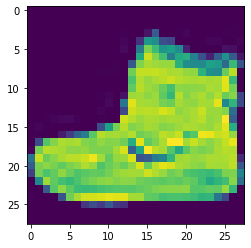

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8927


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8792


[0.3462221324443817, 0.8791999816894531]

ဘယ်အချိန် ရပ်မလဲ ဘယ်လောက် တိကျရင် train တာ ရပ်မလဲ...

Callbacks ဆိုတာရှိတယ်

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1857/1875 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8960
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8961


In [ ]:
digitminist = tf.keras.datasets.mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = digitminist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(training_images[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(training_labels[0])

5


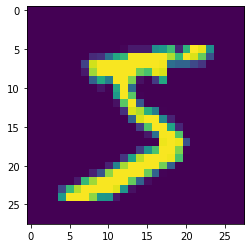

In [ ]:
plt.imshow(training_images[0])